In [24]:
import torch
from torch.utils import data as data_
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
import torchvision
import cv2

In [25]:
class CNN(nn.Module):
  def __init__(self): # 建立 類 CNN 時執行，裡面可以寫想要被建立的layer
    super(CNN, self).__init__()
    self.conv1 = nn.Sequential(
        nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 5, stride = 1, padding = 2,),
        # stride = 1, padding = (kernel_size-1)/2 = (5-1)/2
        # out_channels=16 代表建立16個kernel，所以會擷取16個特徵，一張圖輸出16個特徵矩陣
        # padding 是padding在四周，所以kernel的中心可以在原始圖像上全部走一遍，使的輸出和輸入一樣大小
        nn.ReLU(),# (16, 28, 28)
        nn.MaxPool2d(kernel_size = 2),# (16, 14, 14)
    )
    self.conv2 = nn.Sequential(# (16, 14, 14)
        nn.Conv2d(16, 32, 5, 1, 2),# (32, 14, 14)
        nn.ReLU(),# (32,14,14)
        nn.MaxPool2d(2)# (32, 7, 7)
    )
    self.out = nn.Linear(32*7*7, 10) # 輸出10個類別

  def forward(self, x): # 定義輸入x要經過那些層
    x = self.conv1(x)
    x = self.conv2(x)
    x = x.view(x.size(0), -1)
    output = self.out(x)
    return output, x

cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [26]:
cnn = torch.load('./model/cnn_model.pth')
cnn.eval()  # 切換到評估模式

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)

In [27]:
def predict_and_show_resized(img, model):
    
    # 將圖片轉換為PyTorch張量（Tensor）
    img_tensor = torch.Tensor(img).unsqueeze(0).unsqueeze(0) / 255.0  # 歸一化並增加 batch 和 channel 維度
    
    # 使用模型進行預測
    model.eval()
    with torch.no_grad():
        output, _ = model(img_tensor)
    
    # 從模型輸出中獲得預測的數字
    predicted_num = torch.max(output, 1)[1].data.numpy()[0]  # 注意我在這裡添加了[0]來獲取純數字，而不是一個單一元素的數組
    
    # 畫出原始圖片
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")
    plt.show()
    
    # 用文字顯示預測結果
    print(f"Predicted number is: {predicted_num}")

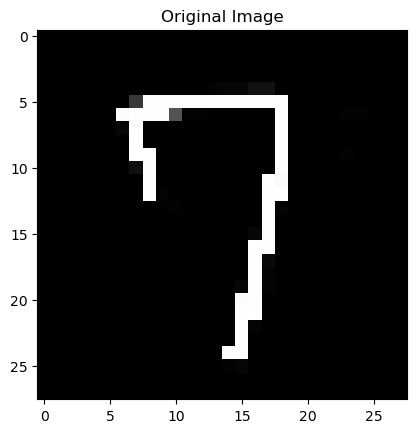

Predicted number is: 7


In [31]:
# 讀取JPG圖片
img_color = cv2.imread('./test_picture/real.jpg')  # 將 'your_image.jpg' 替換為你的JPG檔案路徑

# 將彩色圖片轉換為灰度圖像
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# 圖像反相
img_gray_inverted = cv2.bitwise_not(img_gray)

# 如果 img 不是 28x28，使用OpenCV來調整大小
if img_gray_inverted.shape != (28, 28):
    img_gray_inverted = cv2.resize(img_gray_inverted, (28, 28))

# 使用函數進行預測和顯示
# 假設 cnn 是你已經訓練好的模型
predict_and_show_resized(img_gray_inverted, cnn)  # 將 'cnn' 替換為你的實際模型變數名稱
